In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
def mesh_mm(ensaio):
    if ensaio == 3.5: return 5.66
    if ensaio == 4: return 4.76
    if ensaio == 5: return 4
    if ensaio == 6: return 3.36
    if ensaio == 7: return 2.83
    if ensaio == 8: return 2.38
    if ensaio == 10: return 2
    if ensaio == 12: return 1.68
    if ensaio == 14: return 1.41
    if ensaio == 16: return 1.19
    if ensaio == 18: return 1
    if ensaio == 20: return 0.84
    if ensaio == 25: return 0.71
    if ensaio == 30: return 0.59
    if ensaio == 35: return 0.5
    if ensaio == 40: return 0.42
    if ensaio == 45: return 0.35
    if ensaio == 50: return 0.297
    if ensaio == 60: return 0.25
    if ensaio == 70: return 0.21
    if ensaio == 80: return 0.177
    if ensaio == 100: return 0.149
    if ensaio == 120: return 0.125
    if ensaio == 140: return 0.105
    if ensaio == 170: return 0.088
    if ensaio == 200: return 0.074
    if ensaio == 'cuba':return 'cuba'

In [55]:
peneira = [4,6,10,20,40,60,100,200,'cuba']
massa = [0,30,48.7,127.3,96.8,76.6,55.2,43.4,22]

dado = pd.DataFrame({'Peneira':peneira,'Massa':massa})

In [56]:
dado

,Peneira,Massa
0,4,0.0
1,6,30.0
2,10,48.7
3,20,127.3
4,40,96.8
5,60,76.6
6,100,55.2
7,200,43.4
8,cuba,22.0


In [57]:
dado['mm'] = dado.Peneira.apply(mesh_mm)
dado

,Peneira,Massa,mm
0,4,0.0,4.76
1,6,30.0,3.36
2,10,48.7,2
3,20,127.3,0.84
4,40,96.8,0.42
5,60,76.6,0.25
6,100,55.2,0.149
7,200,43.4,0.074
8,cuba,22.0,cuba


In [58]:
dado.Massa.sum()

500.0

In [60]:
dado.Massa/dado.Massa.sum()

0    0.0000
1    0.0600
2    0.0974
3    0.2546
4    0.1936
5    0.1532
6    0.1104
7    0.0868
8    0.0440
Name: Massa, dtype: float64

In [61]:
dado['Percentual'] = dado['Massa']/dado.Massa.sum()
dado

,Peneira,Massa,mm,Percentual
0,4,0.0,4.76,0.0000
1,6,30.0,3.36,0.0600
2,10,48.7,2,0.0974
3,20,127.3,0.84,0.2546
4,40,96.8,0.42,0.1936
5,60,76.6,0.25,0.1532
6,100,55.2,0.149,0.1104
7,200,43.4,0.074,0.0868
8,cuba,22.0,cuba,0.0440


In [64]:
def soma_cum(percentual):
    soma_cum = np.zeros(len(percentual))
    aux = 0.0
    for i in range(0,len(soma_cum)):
        soma_cum[i]=aux+percentual[i]
        aux=soma_cum[i]
    soma_cum=soma_cum*100
    return sorted(soma_cum,reverse=True)

In [65]:
dado['Porcentagem_fina'] = soma_cum(dado.Percentual)
dado

,Peneira,Massa,mm,Percentual,Porcentagem_fina
0,4,0.0,4.76,0.0000,100.00
1,6,30.0,3.36,0.0600,95.60
2,10,48.7,2,0.0974,86.92
3,20,127.3,0.84,0.2546,75.88
4,40,96.8,0.42,0.1936,60.56
5,60,76.6,0.25,0.1532,41.20
6,100,55.2,0.149,0.1104,15.74
7,200,43.4,0.074,0.0868,6.00
8,cuba,22.0,cuba,0.0440,0.00


Text(0, 0.5, 'Porcentagem mais fina')

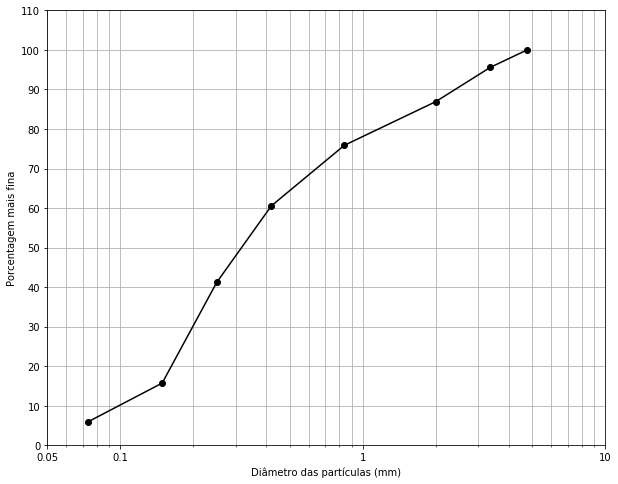

In [67]:
plt.figure(figsize=(10,8))

plt.plot(dado.mm[:-1],dado.Porcentagem_fina[:-1],marker='o',c='black')
plt.xscale('log')

plt.xticks([0.05,0.1,1,10],[0.05,0.1,1,10])

plt.yticks(np.arange(0,120,10))
plt.ylim(0,110)

plt.grid(which='minor')
plt.grid(which='major')

plt.xlabel('Diâmetro das partículas (mm)')
plt.ylabel('Porcentagem mais fina')

In [68]:
d10 = 0.1

In [69]:
d60 = 0.4

In [70]:
Cuni = d60/d10
Cuni

4.0

In [71]:
d30 = 0.2

In [72]:
CC = (d30**2)/(d60*d10)
CC

1.0

In [73]:
d75 = 0.85
d25 = 0.18

In [75]:
So = np.sqrt(d75/d25)
So

2.173067468400883

In [76]:
dado

,Peneira,Massa,mm,Percentual,Porcentagem_fina
0,4,0.0,4.76,0.0000,100.00
1,6,30.0,3.36,0.0600,95.60
2,10,48.7,2,0.0974,86.92
3,20,127.3,0.84,0.2546,75.88
4,40,96.8,0.42,0.1936,60.56
5,60,76.6,0.25,0.1532,41.20
6,100,55.2,0.149,0.1104,15.74
7,200,43.4,0.074,0.0868,6.00
8,cuba,22.0,cuba,0.0440,0.00


In [77]:
dado.to_excel('dado-peneira.xlsx')

In [79]:
print(dado.to_latex())

\begin{tabular}{llrlrr}
\toprule
{} & Peneira &  Massa &     mm &  Percentual &  Porcentagem\_fina \\
\midrule
0 &       4 &    0.0 &   4.76 &      0.0000 &            100.00 \\
1 &       6 &   30.0 &   3.36 &      0.0600 &             95.60 \\
2 &      10 &   48.7 &      2 &      0.0974 &             86.92 \\
3 &      20 &  127.3 &   0.84 &      0.2546 &             75.88 \\
4 &      40 &   96.8 &   0.42 &      0.1936 &             60.56 \\
5 &      60 &   76.6 &   0.25 &      0.1532 &             41.20 \\
6 &     100 &   55.2 &  0.149 &      0.1104 &             15.74 \\
7 &     200 &   43.4 &  0.074 &      0.0868 &              6.00 \\
8 &    cuba &   22.0 &   cuba &      0.0440 &              0.00 \\
\bottomrule
\end{tabular}



In [81]:
dado.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Peneira</th>\n      <th>Massa</th>\n      <th>mm</th>\n      <th>Percentual</th>\n      <th>Porcentagem_fina</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>4</td>\n      <td>0.0</td>\n      <td>4.76</td>\n      <td>0.0000</td>\n      <td>100.00</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>6</td>\n      <td>30.0</td>\n      <td>3.36</td>\n      <td>0.0600</td>\n      <td>95.60</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>10</td>\n      <td>48.7</td>\n      <td>2</td>\n      <td>0.0974</td>\n      <td>86.92</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>20</td>\n      <td>127.3</td>\n      <td>0.84</td>\n      <td>0.2546</td>\n      <td>75.88</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>40</td>\n      <td>96.8</td>\n      <td>0.42</td>\n      <td>0.1936</td>\n      <td>60.56</td>\n    </tr>\n    <tr>\n      